# Chinese NLP Toolbox Evaluation

# THULAC
THULAC（THU Lexical Analyzer for Chinese）由清华大学自然语言处理与社会人文计算实验室研制推出的一套中文词法分析工具包，具有<b>中文分词和词性标注功能</b>

https://github.com/thunlp/THULAC-Python

支持 python, c++, java

In [1]:
import thulac 

In [172]:
thu1 = thulac.thulac()  #默认模式
#thu1 = thulac.thulac(seg_only=True)  #只进行分词，不进行词性标注
text = thu1.cut("欢迎科研人员、技术工程师、企事业单位与个人参与NLPIR平台的建设工作。", text=True)  #进行一句话分词
#text_list = thu1.cut("我爱北京天安门", text=False)  #进行一句话分词
print(text)

Model loaded succeed
欢迎_v 科研_n 人员_n 、_w 技术_n 工程师_n 、_w 企事业_n 单位_n 与_p 个人_n 参与_v NLPIR_x 平台_n 的_u 建设_v 工作_v 。_w


# NLPIR-ICTCLAS
- use PyNLPIR A Python wrapper around the NLPIR/ICTCLASA 
- <b>分词，词性标注，关键词抽取</b>

https://github.com/tsroten/pynlpir

In [171]:
# Segmentation and pos tagging
import pynlpir
pynlpir.open()

s = '欢迎科研人员、技术工程师、企事业单位与个人参与NLPIR平台的建设工作。'
pynlpir.segment(s)
#print(pynlpir.segment(s, pos_tagging=False))
termlist = pynlpir.segment(s, pos_tagging=True)
termlist2 = []
for word,nature in termlist:
    termlist2.append('_'.join([word,nature]))
print(' '.join(termlist2))
pynlpir.close()

欢迎_verb 科研_noun 人员_noun 、_punctuation mark 技术_noun 工程师_noun 、_punctuation mark 企事业_noun 单位_noun 与_conjunction 个人_noun 参与_verb NLPIR_noun 平台_noun 的_particle 建设_verb 工作_verb 。_punctuation mark


In [183]:
# keyphrase extraction
import pynlpir
pynlpir.open()

topK = 10
s = '重庆晚报6月11日报道  昨日，市政府公众信息网发布消息称，经2010年5月13日市政府第70次常务会议通过，给予文强、陈洪刚二人行政开除处分。\n今年4月14日，市第五中级人民法院以受贿罪，包庇、纵容黑社会性质组织罪，巨额财产来源不明罪，强奸罪数罪并罚判处文强死刑，剥夺政治权利终身，并处没收个人全部财产。5月21日，市高级人民法院对文强案二审宣判，依法驳回文强上诉，维持一审的死刑判决。\n2月25日，市公安局交警总队原总队长陈洪刚受贿案在市第五中级人民法院一审宣判。陈洪刚因犯受贿，包庇、纵容黑社会性质组织，巨额财产来源不明，伪造居民身份证罪，数罪并罚，被判处有期徒刑20年，没收个人财产40万元人民币，追缴赃款326万余元及不明来源财产584万余元。记者 李伟\n'
keywordList = pynlpir.get_key_words(s, weighted=False)
pynlpir.close()

print(','.join(keywordList[:topK]))

文强,陈洪刚,财产,市政府,判处,死刑,没收,人民法院,宣判,来源


# jieba
- 基于前缀词典实现高效的词图扫描，生成句子中汉字所有可能成词情况所构成的有向无环图 (DAG)

- 采用了动态规划查找最大概率路径, 找出基于词频的最大切分组合

- 对于未登录词，采用了基于汉字成词能力的 HMM 模型，使用了 Viterbi 算法
- <b>分词，词性标注，关键词抽取</b>

https://github.com/fxsjy/jieba

In [174]:
# segmentation
import jieba

seg_list = jieba.cut("欢迎科研人员、技术工程师、企事业单位与个人参与NLPIR平台的建设工作。", cut_all=False)
print("Default Mode: " + " ".join(seg_list))  # 精确模式

Default Mode: 欢迎 科研人员 、 技术 工程师 、 企事业 单位 与 个人 参与 NLPIR 平台 的 建设 工作 。


In [175]:
# pos tagging
import jieba.posseg as pseg

words = pseg.cut("欢迎科研人员、技术工程师、企事业单位与个人参与NLPIR平台的建设工作。")
result = []
for word, flag in words:
    result.append(word + '＿' +flag)
print(' '.join(result))

欢迎＿v 科研人员＿n 、＿x 技术＿n 工程师＿n 、＿x 企事业＿n 单位＿n 与＿p 个人＿n 参与＿v NLPIR＿eng 平台＿n 的＿uj 建设＿vn 工作＿vn 。＿x


In [178]:
# Keyphrase extraction
import jieba.analyse

#'基于 TF-IDF 算法的关键词抽取'
content = '重庆晚报6月11日报道  昨日，市政府公众信息网发布消息称，经2010年5月13日市政府第70次常务会议通过，给予文强、陈洪刚二人行政开除处分。\n今年4月14日，市第五中级人民法院以受贿罪，包庇、纵容黑社会性质组织罪，巨额财产来源不明罪，强奸罪数罪并罚判处文强死刑，剥夺政治权利终身，并处没收个人全部财产。5月21日，市高级人民法院对文强案二审宣判，依法驳回文强上诉，维持一审的死刑判决。\n2月25日，市公安局交警总队原总队长陈洪刚受贿案在市第五中级人民法院一审宣判。陈洪刚因犯受贿，包庇、纵容黑社会性质组织，巨额财产来源不明，伪造居民身份证罪，数罪并罚，被判处有期徒刑20年，没收个人财产40万元人民币，追缴赃款326万余元及不明来源财产584万余元。记者 李伟\n'
topK = 10
tags_tfidf = jieba.analyse.extract_tags(content, topK=topK, withWeight = False)
tags_textrank = jieba.analyse.textrank(content, topK=topK, withWeight = False)

print('\033[93m' + "Key Phrase Extraction Using TFIDF: " + '\033[0m' + ",".join(tags_tfidf))
print('\033[93m' + "Key Phrase Extraction Using TextRank: " + '\033[0m' + ",".join(tags_textrank))

Key Phrase Extraction Using TFIDF: 文强,陈洪刚,巨额财产,来源不明,数罪并罚,包庇,一审,万余元,宣判,黑社会
Key Phrase Extraction Using TextRank: 财产,性质,来源不明,死刑,纵容,没收,市政府,巨额财产,数罪并罚,包庇


# HanLP (java)
- 中文分词
- 词性标注
- 实体识别
- 关键词提取
- 自动摘要
- 短语提取
- 拼音转换
- 简繁转换
- 文本推荐
- 依存句法分析
- 语料库工具

https://github.com/hankcs/HanLP

# ANSJ (java)
- 这是一个基于n-Gram+CRF+HMM的中文分词的java实现。
- 分词速度达到每秒钟大约200万字左右（mac air下测试），准确率能达到96%以上
- 目前实现了：<b>中文分词、关键字提取、自动摘要、关键字标记等功能</b>
- 可以应用到自然语言处理等方面，适用于对分词效果要求高的各种项目.
- 近1年内有更新维护，更新活跃

https://github.com/NLPchina/ansj_seg

# FudanNLP (java)
- 信息检索： **文本分类 新闻聚类**
- 中文处理： **中文分词 词性标注 实体名识别 关键词抽取 依存句法分析 时间短语识别**
- 结构化学习： **在线学习 层次分类 聚类**

# THUTAG (java)
 - A Package of **Kephrase Extraction and Social Tag Suggetion**
 
https://github.com/FudanNLP/fnlp

# 哈工大LTP
- originally written in C++. provide interface for Python and Java
- Segmentation with customed lexicon

https://github.com/HIT-SCIR/ltp

https://github.com/HIT-SCIR/pyltp

In [1]:
# Segmentation 分词
from pyltp import Segmentor
segmentor = Segmentor()
segmentor.load("/home/user/Python_notebooks/chinese_nlp/ltp-cws/ltp_data_v3.4.0/cws.model")
words = segmentor.segment("元芳你怎么看")
print(" ".join(words))
segmentor.release()

元芳 你 怎么 看


In [19]:
# POS Tagging 词性标注
# -*- coding: utf-8 -*-
from pyltp import Postagger
postagger = Postagger() # 初始化实例
postagger.load("/home/user/Python_notebooks/chinese_nlp/ltp-cws/ltp_data_v3.4.0/pos.model")  # 加载模型

words = ['元芳', '你', '怎么', '看']  # 分词结果
postags = postagger.postag(words)  # 词性标注

result = []
for word,pos in zip(words,postags):
    result.append(word + '_' + pos)
print(' '.join(result))
postagger.release()  # 释放模型

元芳_nh 你_r 怎么_r 看_v


In [29]:
# Named Entity Recognition 命名实体识别
# 人名，机构名，地名
# -*- coding: utf-8 -*-
from pyltp import NamedEntityRecognizer
recognizer = NamedEntityRecognizer() # 初始化实例
recognizer.load("/home/user/Python_notebooks/chinese_nlp/ltp-cws/ltp_data_v3.4.0/ner.model")  # 加载模型

words = ['元芳', '你', '怎么', '看']
postags = ['nh', 'r', 'r', 'v']
netags = recognizer.recognize(words, postags)  # 命名实体识别

result = []
for word, netag in zip(words,netags):
    result.append(word+"_"+netag)
print(' '.join(result))
recognizer.release()  # 释放模型

元芳_S-Nh 你_O 怎么_O 看_O


# Performance Comparison

## Segmentation
Second International Chinese Word Segmentation Bakeoff data contains:

http://sighan.cs.uchicago.edu/bakeoff2005/

- CKIP, Academia Sinica, Taiwan (604KB, traditional chinese)

- City University of Hong Kong, Hong Kong SAR (197KB, traditional chinese)

- Beijing Universty, China (498KB)

- Microsoft Research, China (548KB)

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (7.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [14]:
import pandas as pd

score = pd.read_csv('icwb2-result/segmentation_comparison.csv')

Text(0.5,1,'Fmeasure')

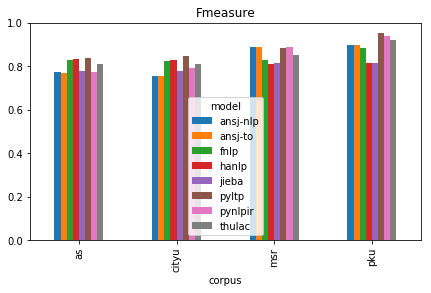

In [15]:
score2 = score.pivot(index='corpus', columns='model', values='fmeasure')
score2.plot.bar();
plt.title("Fmeasure")

Text(0.5,1,'Time')

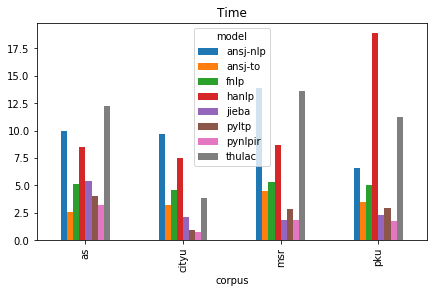

In [16]:
score2 = score.pivot(index='corpus', columns='model', values='time')
score2.plot.bar();
plt.title("Time")

## summary
- pyltp wins.

## POS tagging
**Dataset**:基于哈工大的”词性-词义_合并结果.txt”

https://www.ltp-cloud.com/download/

**测试方法**: 对于每一行，评测分词结果相同的term总数累加为total，词性准确的term总数累加为correct， 最后通过correct/total计算词性识别的准确性

- find the natures computed by all models and ground truth
- find the intersection of the natures
- only consider these intersection when calculating pos accuracy

<caption><center>**Accuracy of various POS tagging models**</center></caption>
<img src="hit-result/pos_comparison.png" style="width:600px;height:300px;">

## Key Phrase Extraction

### Input:

重庆晚报6月11日报道  昨日，市政府公众信息网发布消息称，经2010年5月13日市政府第70次常务会议通过，给予文强、陈洪刚二人行政开除处分。今年4月14日，市第五中级人民法院以受贿罪，包庇、纵容黑社会性质组织罪，巨额财产来源不明罪，强奸罪数罪并罚判处文强死刑，剥夺政治权利终身，并处没收个人全部财产。5月21日，市高级人民法院对文强案二审宣判，依法驳回文强上诉，维持一审的死刑判决。2月25日，市公安局交警总队原总队长陈洪刚受贿案在市第五中级人民法院一审宣判。陈洪刚因犯受贿，包庇、纵容黑社会性质组织，巨额财产来源不明，伪造居民身份证罪，数罪并罚，被判处有期徒刑20年，没收个人财产40万元人民币，追缴赃款326万余元及不明来源财产584万余元。记者 李伟


### Output:

- <b>HanLP (textrank)</b>: 文强,没收,陈洪刚,财产,死刑,宣判,五中,包庇,判处,人民法院
- <b>jieba-tfidf</b>: 文强,陈洪刚,巨额财产,来源不明,数罪并罚,包庇,一审,万余元,宣判,黑社会
- <b>jieba-textrank</b>: 财产,性质,来源不明,死刑,纵容,没收,市政府,巨额财产,数罪并罚,包庇
- <b>NLPIR/ICTCLAS</b>: 文强,陈洪刚,财产,市政府,判处,死刑,没收,人民法院,宣判,来源
- <b>ANSJ (tfidf)</b>: 文强,人民法院,陈洪刚,中级,巨额,常务,昨日,二审,一审,重庆
- <b>THUTAG - WAM</b>: 死刑,交警,身份证,一审,开除,宣判,伪造,财产,受贿,没收
- <b>THUTAG - ExpandRank</b>: 市政府,没收,财产,死刑,宣判,财产来源不明,一审,巨额,总队,组织
- <b>THUTAG - TFIDF</b>: 洪刚,财产来源不明,包庇,黑社会性质,纵容 
- <b>THUTAG - TextPageRank</b>: 洪刚,市政府,没收,财产,死刑,宣判,财产来源不明,一审,巨额,第五 
- <b>THUTAG - TopicPageRank</b>: 万元,死刑,洪刚,没收,一审,人民法院,宣判,财产,中级,总队
- <b>fnlp</b>: 市,财产,法院,文强,罪,陈洪刚,来源,元,没收,判处

### Evaluation
**Dataset**: The KeywordPost.dot is from NetEase News, which can be used for keyphrase extraction algorithm. Downloaded from THUTAG project (https://github.com/thunlp/THUTag)
<caption><center>**Recall score of various models**</center></caption>
<img src="keyphrase_evaluation/KeyphraseExtraction.png" style="width:650px;height:300px;">